# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
base_url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = base_url + "appid=" + weather_api_key + "&q=" + city + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

     # If an error is experienced, skip the city
    except:
         print("City not found. Skipping...")
         pass
    
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | wynyard
Processing Record 2 of Set 1 | east london
Processing Record 3 of Set 1 | isafjordur
Processing Record 4 of Set 1 | okoneshnikovo
Processing Record 5 of Set 1 | iqaluit
Processing Record 6 of Set 1 | bahia de kino
Processing Record 7 of Set 1 | manisa
Processing Record 8 of Set 1 | edinburgh of the seven seas
Processing Record 9 of Set 1 | alcacer do sal
Processing Record 10 of Set 1 | klyuchi
Processing Record 11 of Set 1 | taiohae
City not found. Skipping...
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | tazovsky
Processing Record 14 of Set 1 | grytviken
Processing Record 15 of Set 1 | lianzhou
Processing Record 16 of Set 1 | stanley
Processing Record 17 of Set 1 | mont-tremblant
Processing Record 18 of Set 1 | inarajan village
Processing Record 19 of Set 1 | tiksi
Processing Record 20 of Set 1 | williamsport
Processing Record 21 of Set 1 | dudinka
Pro

Processing Record 42 of Set 4 | sorong
Processing Record 43 of Set 4 | paracale
Processing Record 44 of Set 4 | la passe
Processing Record 45 of Set 4 | garoowe
Processing Record 46 of Set 4 | pacific grove
Processing Record 47 of Set 4 | oamaru
Processing Record 48 of Set 4 | namtsy
Processing Record 49 of Set 4 | brookings
Processing Record 0 of Set 5 | teknaf
Processing Record 1 of Set 5 | asau village
City not found. Skipping...
Processing Record 2 of Set 5 | zhaotong
Processing Record 3 of Set 5 | brigantine
Processing Record 4 of Set 5 | eatonton
Processing Record 5 of Set 5 | al wafrah
Processing Record 6 of Set 5 | miranda
Processing Record 7 of Set 5 | balsas
Processing Record 8 of Set 5 | kailua-kona
Processing Record 9 of Set 5 | itamaraca
Processing Record 10 of Set 5 | fort st. john
Processing Record 11 of Set 5 | maceio
Processing Record 12 of Set 5 | utrik
Processing Record 13 of Set 5 | mukalla
Processing Record 14 of Set 5 | 'ohonua
City not found. Skipping...
Processi

Processing Record 32 of Set 8 | victoria point
Processing Record 33 of Set 8 | nuku'alofa
Processing Record 34 of Set 8 | happy valley-goose bay
Processing Record 35 of Set 8 | pagar alam
Processing Record 36 of Set 8 | howrah
Processing Record 37 of Set 8 | ghat
Processing Record 38 of Set 8 | fuvahmulah
City not found. Skipping...
Processing Record 39 of Set 8 | sitka
Processing Record 40 of Set 8 | tortum
Processing Record 41 of Set 8 | surgut
Processing Record 42 of Set 8 | labrador city
Processing Record 43 of Set 8 | anadyr
Processing Record 44 of Set 8 | xinxiang
Processing Record 45 of Set 8 | putian
Processing Record 46 of Set 8 | faya-largeau
Processing Record 47 of Set 8 | eastham
Processing Record 48 of Set 8 | mbala
Processing Record 49 of Set 8 | bokovskaya
Processing Record 0 of Set 9 | agat village
Processing Record 1 of Set 9 | bowen
Processing Record 2 of Set 9 | odesskoye
Processing Record 3 of Set 9 | javier rojo gomez
City not found. Skipping...
Processing Record 4

Processing Record 20 of Set 12 | tolanaro
Processing Record 21 of Set 12 | richards bay
Processing Record 22 of Set 12 | tchaourou
Processing Record 23 of Set 12 | zarghun shahr
Processing Record 24 of Set 12 | lucheng
Processing Record 25 of Set 12 | tranovaho
City not found. Skipping...
Processing Record 26 of Set 12 | sirte
Processing Record 27 of Set 12 | beira
Processing Record 28 of Set 12 | morigaon
Processing Record 29 of Set 12 | korotchaevo
City not found. Skipping...
Processing Record 30 of Set 12 | tulum
Processing Record 31 of Set 12 | zhezqazghan
Processing Record 32 of Set 12 | caluula
Processing Record 33 of Set 12 | ciudad lazaro cardenas
Processing Record 34 of Set 12 | prince rupert
Processing Record 35 of Set 12 | porto novo
Processing Record 36 of Set 12 | datteln
Processing Record 37 of Set 12 | lubao
Processing Record 38 of Set 12 | cooper's town
Processing Record 39 of Set 12 | arnstorf
Processing Record 40 of Set 12 | bossangoa
Processing Record 41 of Set 12 | 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,wynyard,-41.0000,145.7167,14.88,92,100,5.33,AU,1702505621
1,east london,-33.0153,27.9116,20.13,89,97,7.26,ZA,1702505621
2,isafjordur,66.0755,-23.1240,1.07,87,57,4.35,IS,1702505591
3,okoneshnikovo,54.8377,75.0834,-19.13,80,100,5.91,RU,1702505622
4,iqaluit,63.7506,-68.5145,-13.15,72,75,3.09,CA,1702505579


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,wynyard,-41.0000,145.7167,14.88,92,100,5.33,AU,1702505621
1,east london,-33.0153,27.9116,20.13,89,97,7.26,ZA,1702505621
2,isafjordur,66.0755,-23.1240,1.07,87,57,4.35,IS,1702505591
3,okoneshnikovo,54.8377,75.0834,-19.13,80,100,5.91,RU,1702505622
4,iqaluit,63.7506,-68.5145,-13.15,72,75,3.09,CA,1702505579


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

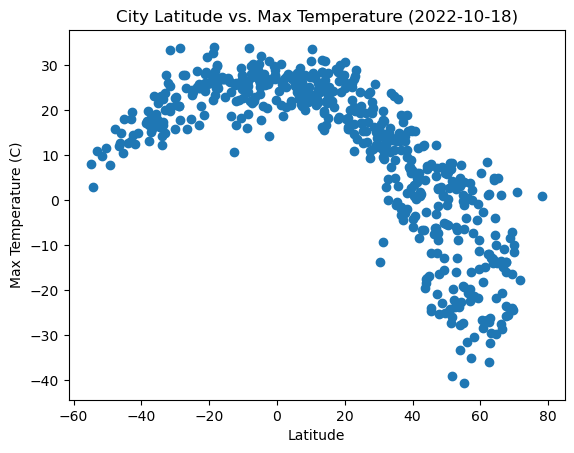

In [9]:
# Build scatter plot for latitude vs. temperature
lat_temp_scatter = plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.ylabel('Max Temperature (C)')
plt.xlabel('Latitude')
plt.title('City Latitude vs. Max Temperature (2022-10-18)')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

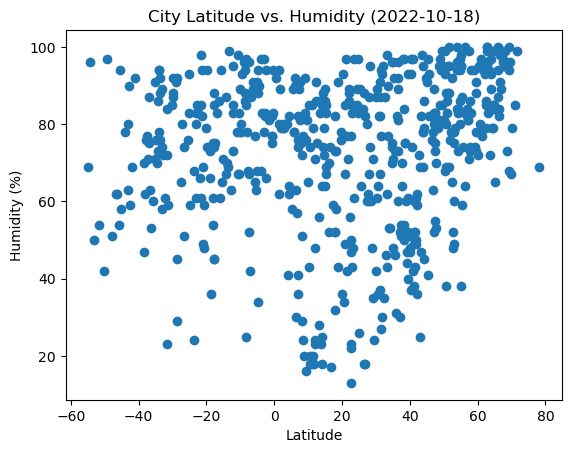

In [10]:
# Build the scatter plots for latitude vs. humidity
lat_humidity_scatter = plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])

# Incorporate the other graph properties
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.title('City Latitude vs. Humidity (2022-10-18)')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

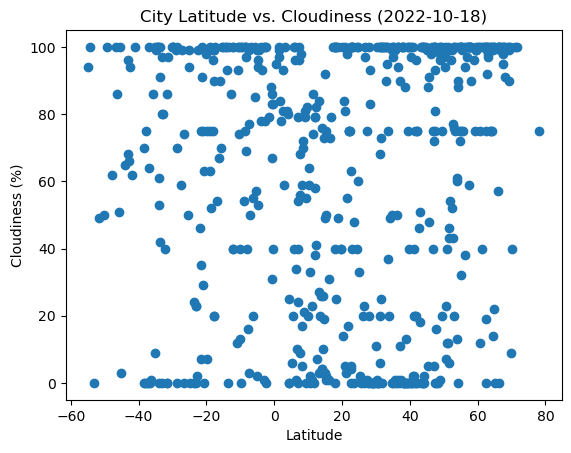

In [11]:
# Build the scatter plots for latitude vs. cloudiness
lat_cloud_scatter = plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.title('City Latitude vs. Cloudiness (2022-10-18)')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

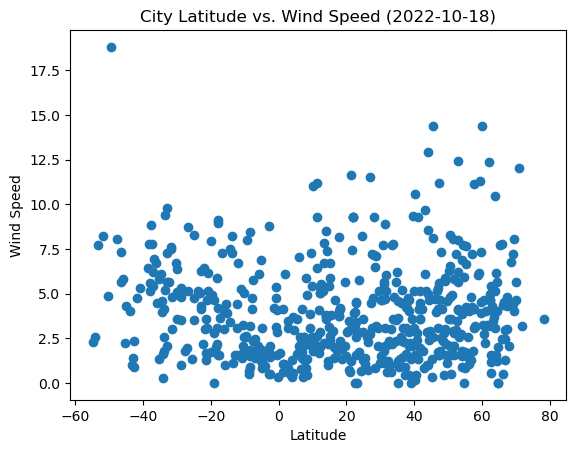

In [12]:
# Build the scatter plots for latitude vs. wind speed
lat_wind_scatter = plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.title('City Latitude vs. Wind Speed (2022-10-18)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,isafjordur,66.0755,-23.1240,1.07,87,57,4.35,IS,1702505591
3,okoneshnikovo,54.8377,75.0834,-19.13,80,100,5.91,RU,1702505622
4,iqaluit,63.7506,-68.5145,-13.15,72,75,3.09,CA,1702505579
5,bahia de kino,28.8333,-111.9333,25.96,48,0,3.16,MX,1702505623
6,manisa,38.8333,28.1667,7.48,60,13,2.24,TR,1702505623


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,wynyard,-41.0000,145.7167,14.88,92,100,5.33,AU,1702505621
1,east london,-33.0153,27.9116,20.13,89,97,7.26,ZA,1702505621
7,edinburgh of the seven seas,-37.0676,-12.3116,15.25,87,100,5.42,SH,1702505581
10,port-aux-francais,-49.3500,70.2167,7.93,97,100,18.80,TF,1702505578
12,grytviken,-54.2811,-36.5092,2.98,96,100,2.56,GS,1702505584


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8407838665925138


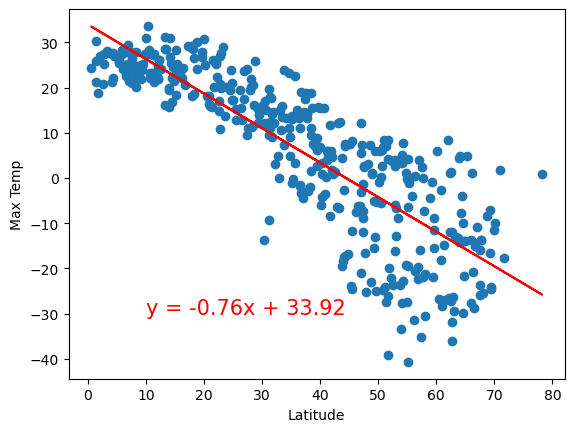

In [17]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']

plt.scatter(x, y)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(10,-30),fontsize=15,color="red")

print(f'The r-value is: {rvalue}')

plt.show()

The r-value is: 0.6652870937316596


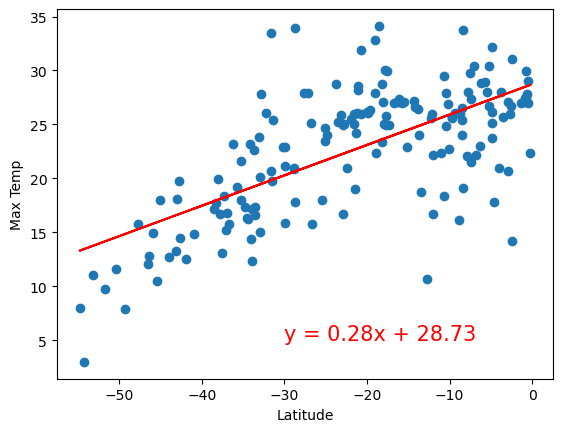

In [19]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']

plt.scatter(x, y)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(-30,5),fontsize=15,color="red")

print(f'The r-value is: {rvalue}')

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.35374738918764703


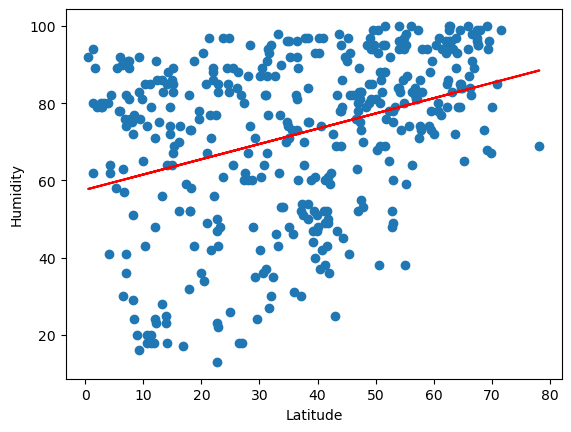

In [20]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']

plt.scatter(x, y)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(40,5),fontsize=15,color="red")

print(f'The r-value is: {rvalue}')

plt.show()

The r-value is: 0.1960211573563751


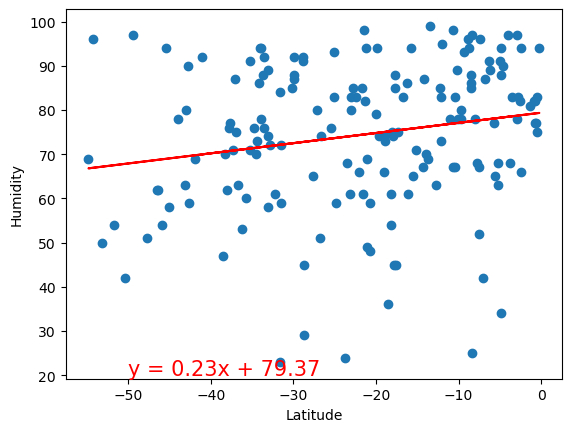

In [21]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']

plt.scatter(x, y)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")

print(f'The r-value is: {rvalue}')

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.2647855552229366


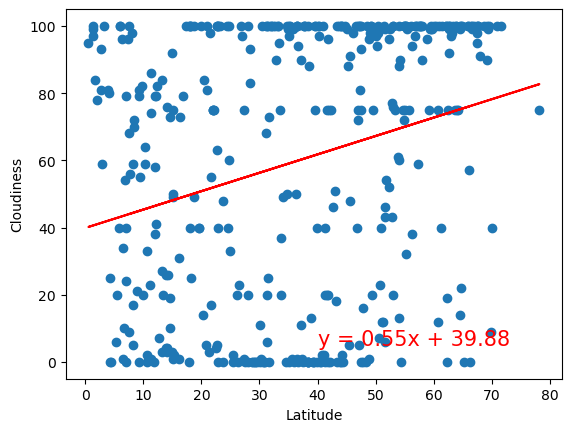

In [22]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']

plt.scatter(x, y)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(40,5),fontsize=15,color="red")

print(f'The r-value is: {rvalue}')

plt.show()

The r-value is: 0.08555234622710228


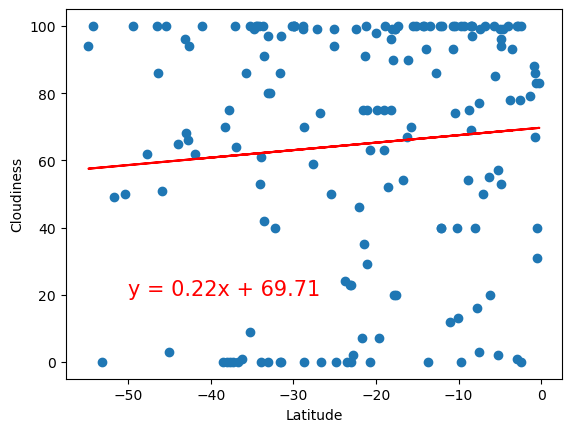

In [23]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']

plt.scatter(x, y)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")

print(f'The r-value is: {rvalue}')

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.14365067000902138


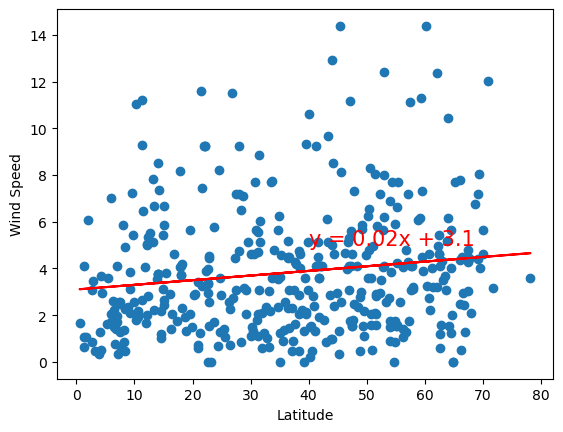

In [24]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']

plt.scatter(x, y)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(40,5),fontsize=15,color="red")

print(f'The r-value is: {rvalue}')

plt.show()

The r-value is: -0.3574808045499226


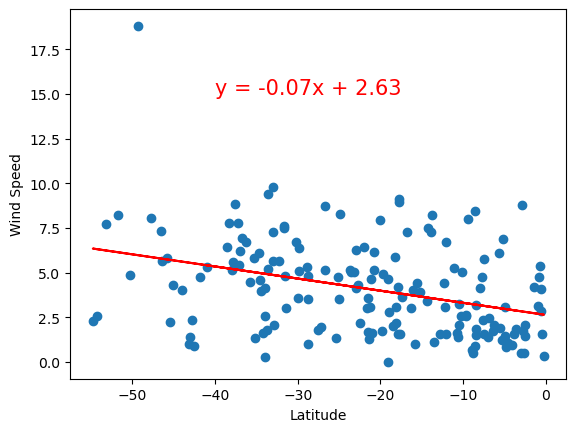

In [26]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']

plt.scatter(x, y)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(-40,15),fontsize=15,color="red")

print(f'The r-value is: {rvalue}')

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE